In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
        roc_auc_score, confusion_matrix, classification_report, roc_curve
        )
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [7]:
file_path='/content/drive/MyDrive/MACHINE LEARNING/breast-cancer.csv'
df = pd.read_csv(file_path)


In [8]:
print("First five rows of the dataset:")
print(df.head())


First five rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_

In [9]:
target_col = 'diagnosis'

In [10]:
X = df.drop(columns=[target_col])
y = df[target_col]


In [11]:
y = y.astype(str).str.strip().str.lower()
le = LabelEncoder()
y = le.fit_transform(y)


In [12]:
X = X.select_dtypes(include=[np.number])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42
)



In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [16]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [17]:
print("=== Model Evaluation ===")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")
try:
  print(f"ROC AUC:   {roc_auc_score(y_test, y_pred):.4f}")
except:
  print("ROC AUC could not be computed (only one class in test set).")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

=== Model Evaluation ===
Accuracy:  0.9708
Precision: 0.9531
Recall:    0.9683
F1 Score:  0.9606
ROC AUC:   0.9702

Confusion Matrix:
[[105   3]
 [  2  61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



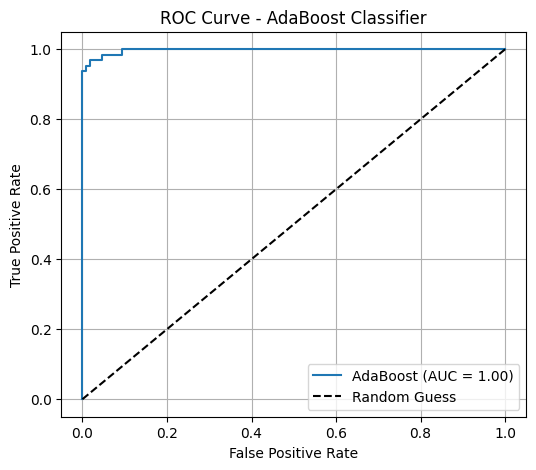

In [18]:
if len(np.unique(y_test)) == 2:
      y_prob = model.predict_proba(X_test)[:, 1]
      fpr, tpr, _ = roc_curve(y_test, y_prob)
      plt.figure(figsize=(6, 5))
      plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {roc_auc_score(y_test, y_prob):.2f})")
      plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.title("ROC Curve - AdaBoost Classifier")
      plt.legend()
      plt.grid(True)
      plt.show()
else:
  print("\nROC curve not plotted — only one class present in test data.")